<a href="https://colab.research.google.com/github/Arjun650/MachineLearning/blob/main/Lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
from google.colab import drive
drive.mount('combined_dataset.csv')

Drive already mounted at combined_dataset.csv; to attempt to forcibly remount, call drive.mount("combined_dataset.csv", force_remount=True).


In [8]:
df = pd.read_csv('/combined_dataset.csv')
df

,Time Stamp,Speaker,Transcript,Label,Numeric_Label
0,00:00:04,Speaker 1,Yeah.,Statement,1
1,00:00:05,Speaker 1,So can you tell me now? We'll go one after ano...,Statement,1
2,00:00:13,Speaker 2,"OK, OK. Yeah.",Statement,1
3,00:00:15,Speaker 1,So tell me.,Statement,1
4,00:00:19,Speaker 1,What is sampling? What is sampling?,Question,-1
...,...,...,...,...,...
3657,00:10:28,Speaker 2,OK. Thank you very much.,Statement,1
3658,00:10:29,Speaker 3,"So basically, yes Sir.",Statement,1
3659,00:10:32,Speaker 2,You are saying something?,Question,-1
3660,00:10:33,Speaker 3,"No, Sir. No, Sir. Thank you.",Statement,1


In [11]:
text_data  = df['Transcript']
text_data

,Transcript
0,Yeah.
1,So can you tell me now? We'll go one after ano...
2,"OK, OK. Yeah."
3,So tell me.
4,What is sampling? What is sampling?
...,...
3657,OK. Thank you very much.
3658,"So basically, yes Sir."
3659,You are saying something?
3660,"No, Sir. No, Sir. Thank you."


In [13]:
vectorizer = TfidfVectorizer()

# Fit and transform the text data into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(text_data)

# Convert the TF-IDF matrix to a DataFrame for easier viewing (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

    00  000  001   01   03   10  100  1000  10s   11  ...      yeah  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  1.000000   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.572895   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000   0.0   

   yes   ym       you  your  yours  yourself  zero  zeros  
0  0.0  0.0  0.000000   0.0    0.0       0.0   0.0    0.0  
1  0.0  0.0  0.078958   0.0    0.0       0.0   0.0    0.0  
2  0.0  0.0  0.000000   0.0    0.0       0.0   0.0    0.0  
3  0.0  0.0  0.000000   0.0    0.0       0.0   0.0    0.0  
4  0.0  0.0  0.000000   0.0    0.0       0.0   0.0    0.0  

[5 rows x 2326 columns]


In [29]:
a = tfidf_df['yeah'].to_numpy()
b = df['Numeric_Label'].to_numpy()

a = np.array(a)
b = np.array(b)

In [33]:
def summation_unit(inputs, weights, bias=0):
    """
    Compute the weighted sum of the inputs.

    Parameters:
    - inputs: list or array of input values.
    - weights: list or array of weights corresponding to the inputs.
    - bias: optional bias term (default is 0).

    Returns:
    - Weighted sum (scalar).
    """
    return sum(i * w for i, w in zip(inputs, weights)) + bias

x = summation_unit(a, b)


In [38]:
import math

# Step function
def step_activation(x):
    return 1 if x >= 0 else 0

# Bipolar Step function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Sigmoid function
def sigmoid_activation(x):
    return 1 / (1 + math.exp(-x))

# TanH function
def tanh_activation(x):
    return math.tanh(x)

# ReLU (Rectified Linear Unit) function
def relu_activation(x):
    return max(0, x)

# Leaky ReLU function
def leaky_relu_activation(x, alpha=0.01):
    return x if x >= 0 else alpha * x

step_activation(x)
bipolar_step_activation(x)
sigmoid_activation(x)
tanh_activation(x)
relu_activation(x)
leaky_relu_activation(x)


36.0309439788929

In [40]:
# Mean Squared Error
def mean_squared_error(targets, predictions):
    return sum((t - p) ** 2 for t, p in zip(targets, predictions)) / len(targets)

# Absolute Error
def absolute_error(targets, predictions):
    return sum(abs(t - p) for t, p in zip(targets, predictions)) / len(targets)

    #needs to be confirmed by sir .
    #did not understand


In [42]:
# To implement a simple perceptron from scratch, you need to follow these steps:

# Initialize the Weights: Use the provided initial weights.
# Implement the Activation Function: For a perceptron, this is typically a step function.
# Compute the Output: Calculate the weighted sum of inputs and apply the activation function.
# Update the Weights: Adjust the weights based on the error.

import numpy as np

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        # Initialize weights and learning rate
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights
        self.learning_rate = learning_rate
        self.bias = self.weights[0]  # Bias is the weight W0

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Compute the weighted sum
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.bias
        return self.activation_function(weighted_sum)

    def update_weights(self, inputs, error):
        # Update weights and bias based on error
        self.weights[1:] += self.learning_rate * error * inputs
        self.bias += self.learning_rate * error

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.update_weights(inputs, error)

# Define training data (example inputs and labels)
training_inputs = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Example labels for AND gate
labels = np.array([0, 0, 0, 0])

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(training_inputs, labels, epochs=10)

# Test the perceptron with new data
test_inputs = np.array([1, 1])
print("Prediction for [1, 1]:", perceptron.predict(test_inputs))


Prediction for [1, 1]: 1


Converged after 131 epochs.


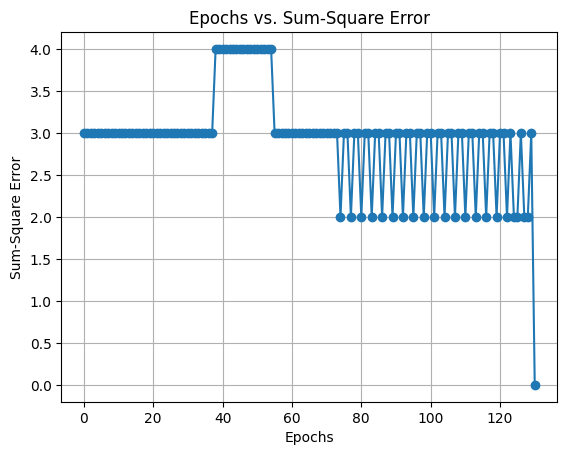

In [45]:
# To implement and train a perceptron for the AND gate logic with the specified step activation function, we will follow these steps:
# Define the Step Activation Function: The activation function will be a step function that outputs 1 if the input is greater than or equal to 0, and 0 otherwise.
# Train the Perceptron: We will update the weights based on the error between the predicted and actual output for the training samples.
# Monitor Convergence: Calculate the sum-square-error (SSE) after each epoch and stop the training if the error is less than or equal to 0.002 or if 1000 epochs are reached.
# Plot Error vs. Epochs: Track the error over epochs and plot it.
import matplotlib.pyplot as plt

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        # Initialize weights and learning rate
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights (W0, W1, W2)
        self.learning_rate = learning_rate
        self.bias = self.weights[0]  # Bias is the weight W0
        self.weights = np.insert(self.weights[1:], 0, self.bias)  # Insert bias as the first weight

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Compute the weighted sum
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.step_function(weighted_sum)

    def update_weights(self, inputs, error):
        # Update weights and bias based on error
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error

    def train(self, training_inputs, labels, max_epochs=1000, convergence_threshold=0.002):
        epoch_errors = []
        for epoch in range(max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.update_weights(inputs, error)
                total_error += error ** 2
            epoch_errors.append(total_error)
            if total_error <= convergence_threshold:
                print(f"Converged after {epoch + 1} epochs.")
                break
        return epoch_errors

# Define training data for AND gate
training_inputs = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Define labels for AND gate
labels = np.array([0, 1, 0, 0])

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
epoch_errors = perceptron.train(training_inputs, labels)

# Plot error vs. epochs
plt.plot(range(len(epoch_errors)), epoch_errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid(True)
plt.show()



Training with step activation function...
step function converged after 131 epochs.
Training with bi-polar activation function...
Training with sigmoid activation function...
Training with relu activation function...


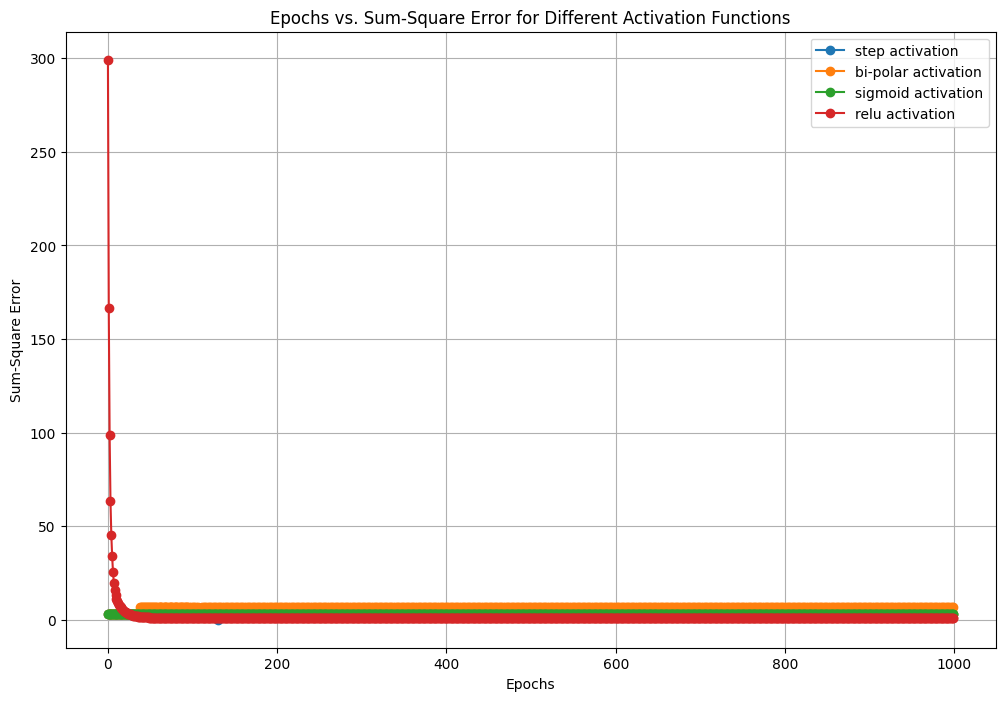

In [47]:
# To repeat the perceptron training experiment with different activation functions, you’ll need to implement the following activation functions:

# Bi-Polar Step Function: This function returns 1 if the input is greater than or equal to 0, and -1 otherwise.
# Sigmoid Function: The sigmoid function returns values between 0 and 1. The output can be transformed to fit the binary classification by scaling and shifting.
# ReLU Function: The ReLU (Rectified Linear Unit) function returns the input if it's greater than 0, and 0 otherwise.

import numpy as np
import matplotlib.pyplot as plt

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05, activation_function='step'):
        self.weights = np.array([10] + [0.2, -0.75])  # Initial weights (W0, W1, W2)
        self.learning_rate = learning_rate
        self.bias = self.weights[0]  # Bias is the weight W0
        self.weights = np.insert(self.weights[1:], 0, self.bias)  # Insert bias as the first weight
        self.activation_function = activation_function

    def activation(self, x):
        if self.activation_function == 'step':
            return 1 if x >= 0 else 0
        elif self.activation_function == 'bi-polar':
            return 1 if x >= 0 else -1
        elif self.activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation_function == 'relu':
            return max(0, x)
        else:
            raise ValueError("Unsupported activation function")

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(weighted_sum)

    def update_weights(self, inputs, error):
        if self.activation_function == 'sigmoid':
            # Sigmoid derivative
            prediction = self.activation(np.dot(inputs, self.weights[1:]) + self.weights[0])
            error *= prediction * (1 - prediction)
        elif self.activation_function == 'relu':
            # ReLU derivative
            prediction = self.activation(np.dot(inputs, self.weights[1:]) + self.weights[0])
            error *= 1 if prediction > 0 else 0

        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error

    def train(self, training_inputs, labels, max_epochs=1000, convergence_threshold=0.002):
        epoch_errors = []
        for epoch in range(max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.update_weights(inputs, error)
                total_error += error ** 2
            epoch_errors.append(total_error)
            if total_error <= convergence_threshold:
                print(f"{self.activation_function} function converged after {epoch + 1} epochs.")
                break
        return epoch_errors

# Define training data for AND gate
training_inputs = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Define labels for AND gate
labels = np.array([0, 1, 0, 0])

# Initialize and train perceptrons with different activation functions
activation_functions = ['step', 'bi-polar', 'sigmoid', 'relu']
errors = {}

for func in activation_functions:
    print(f"Training with {func} activation function...")
    perceptron = Perceptron(input_size=2, activation_function=func)
    epoch_errors = perceptron.train(training_inputs, labels)
    errors[func] = epoch_errors

# Plot error vs. epochs for each activation function
plt.figure(figsize=(12, 8))
for func, epoch_errors in errors.items():
    plt.plot(range(len(epoch_errors)), epoch_errors, marker='o', label=f'{func} activation')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
def xor_gate(inputs, weights, activation_function):
    # Calculate the summation
    weighted_sum = summation_unit(inputs, weights)

    # Apply the activation function
    return activation_function(weighted_sum)

# Example weights for XOR (2 input XOR gate with bias term)
weights = [0.5, 0.5, -0.7]  # Example weights including bias
inputs = [1, 0]  # Example inputs for XOR

# Using Step Activation
output = xor_gate(inputs, weights, step_activation)
print(f"XOR Output (Step Activation): {output}")

# Example for error calculation
predictions = [1, 0, 1, 0]  # Example predictions
targets = [1, 0, 1, 0]  # Example targets
error = mean_squared_error(predictions, targets)
print(f"Mean Squared Error: {error}")


XOR Output (Step Activation): 1
Mean Squared Error: 0.0


In [51]:
import numpy as np

# Data
X = np.array([[20, 6, 2, 386],
              [16, 3, 6, 289],
              [27, 6, 2, 393],
              [19, 1, 2, 110],
              [24, 4, 2, 280],
              [22, 1, 5, 167],
              [15, 4, 2, 271],
              [18, 4, 2, 274],
              [21, 1, 4, 148],
              [16, 2, 4, 198]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(X.shape[1])
bias = np.random.randn()

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the perceptron
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Forward pass
        linear_output = np.dot(X[i], weights) + bias
        prediction = sigmoid(linear_output)

        # Compute error
        error = y[i] - prediction

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {np.mean((y - sigmoid(np.dot(X, weights) + bias))**2)}')

# Make predictions
def predict(X):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output) > 0.5

# Testing the model
predictions = predict(X)
print("Predictions:", predictions)
print("Actual Labels:", y)


Epoch 0: Loss = 0.6
Epoch 100: Loss = 0.6
Epoch 200: Loss = 0.39999999998254887
Epoch 300: Loss = 0.1999999998813591
Epoch 400: Loss = 0.1
Epoch 500: Loss = 0.3
Epoch 600: Loss = 3.492382207998652e-08


<ipython-input-51-a1028b4b499f>:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 700: Loss = 3.4734082479528716e-08
Epoch 800: Loss = 3.454597479450822e-08
Epoch 900: Loss = 3.435947940626133e-08
Predictions: [ True  True  True False  True False  True  True False False]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]


In [53]:
import numpy as np

# Data
X = np.array([[20, 6, 2, 386],
              [16, 3, 6, 289],
              [27, 6, 2, 393],
              [19, 1, 2, 110],
              [24, 4, 2, 280],
              [22, 1, 5, 167],
              [15, 4, 2, 271],
              [18, 4, 2, 274],
              [21, 1, 4, 148],
              [16, 2, 4, 198]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(X.shape[1])
bias = np.random.randn()

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the perceptron
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Forward pass
        linear_output = np.dot(X[i], weights) + bias
        prediction = sigmoid(linear_output)

        # Compute error
        error = y[i] - prediction

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {np.mean((y - sigmoid(np.dot(X, weights) + bias))**2)}')

# Predictions with perceptron
def predict(X):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output) > 0.5

predictions = predict(X)
print("Perceptron Predictions:", predictions)
print("Actual Labels:", y)

# Add a bias term (column of 1s) to the input matrix for pseudo-inverse method
X_biased = np.c_[np.ones(X.shape[0]), X]

# Calculate the pseudo-inverse of X
X_pseudo_inv = np.linalg.pinv(X_biased)

# Calculate weights using the pseudo-inverse
weights_pseudo = np.dot(X_pseudo_inv, y)

# Prediction function using pseudo-inverse
def predict_pseudo(X, weights):
    X_biased = np.c_[np.ones(X.shape[0]), X]
    linear_output = np.dot(X_biased, weights)
    return sigmoid(linear_output) > 0.5

# Testing the model with pseudo-inverse weights
predictions_pseudo = predict_pseudo(X, weights_pseudo)
print("Pseudo-Inverse Predictions:", predictions_pseudo)
print("Actual Labels:", y)


Epoch 0: Loss = 0.6
Epoch 100: Loss = 0.6
Epoch 200: Loss = 0.39999999998254887
Epoch 300: Loss = 0.1999999998813591
Epoch 400: Loss = 0.1
Epoch 500: Loss = 0.3
Epoch 600: Loss = 3.492382207998652e-08

<ipython-input-53-814512741395>:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))



Epoch 700: Loss = 3.4734082479528716e-08
Epoch 800: Loss = 3.454597479450822e-08
Epoch 900: Loss = 3.435947940626133e-08
Perceptron Predictions: [ True  True  True False  True False  True  True False False]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]
Pseudo-Inverse Predictions: [ True  True  True  True  True  True  True  True  True  True]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]


In [55]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize parameters
np.random.seed(42)  # For reproducibility
alpha = 0.05  # Learning rate
max_iterations = 1000
convergence_threshold = 0.002

# Input data for AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Target outputs for AND gate
targets = np.array([[0], [0], [0], [1]])

# Randomly initialize weights
V = np.random.uniform(-0.5, 0.5, (2, 2))  # Weights for input to hidden layer
W = np.random.uniform(-0.5, 0.5, (2, 1))  # Weights for hidden layer to output

# Training loop
for iteration in range(max_iterations):
    # Forward propagation
    H_input = np.dot(inputs, V)  # Input to hidden layer
    H_output = sigmoid(H_input)  # Output from hidden layer

    O_input = np.dot(H_output, W)  # Input to output layer
    O_output = sigmoid(O_input)  # Final output

    # Calculate the error
    error = targets - O_output
    mean_squared_error = np.mean(error ** 2)

    # Check for convergence
    if mean_squared_error <= convergence_threshold:
        print(f"Converged at iteration {iteration+1} with error {mean_squared_error}")
        break

    # Backward propagation
    delta_O = error * sigmoid_derivative(O_output)
    delta_H = delta_O.dot(W.T) * sigmoid_derivative(H_output)

    # Update weights
    W += alpha * H_output.T.dot(delta_O)
    V += alpha * inputs.T.dot(delta_H)

# Print final weights
print("Final weights between input and hidden layer (V):")
print(V)
print("\nFinal weights between hidden and output layer (W):")
print(W)

# Test the network
print("\nTesting the trained network:")
for i in range(len(inputs)):
    H_input = np.dot(inputs[i], V)
    H_output = sigmoid(H_input)
    O_input = np.dot(H_output, W)
    O_output = sigmoid(O_input)
    print(f"Input: {inputs[i]}, Predicted Output: {O_output.round()}, Expected Output: {targets[i]}")



Final weights between input and hidden layer (V):
[[-1.03669502 -0.41868096]
 [-0.63935701 -0.80389562]]

Final weights between hidden and output layer (W):
[[-1.75435368]
 [-1.31071564]]

Testing the trained network:
Input: [0 0], Predicted Output: [0.], Expected Output: [0]
Input: [0 1], Predicted Output: [0.], Expected Output: [0]
Input: [1 0], Predicted Output: [0.], Expected Output: [0]
Input: [1 1], Predicted Output: [0.], Expected Output: [1]
